<a href="https://colab.research.google.com/github/Mayuri172-atole/AutoEncoders/blob/main/AutoEncodersL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##AUTOENCODERS

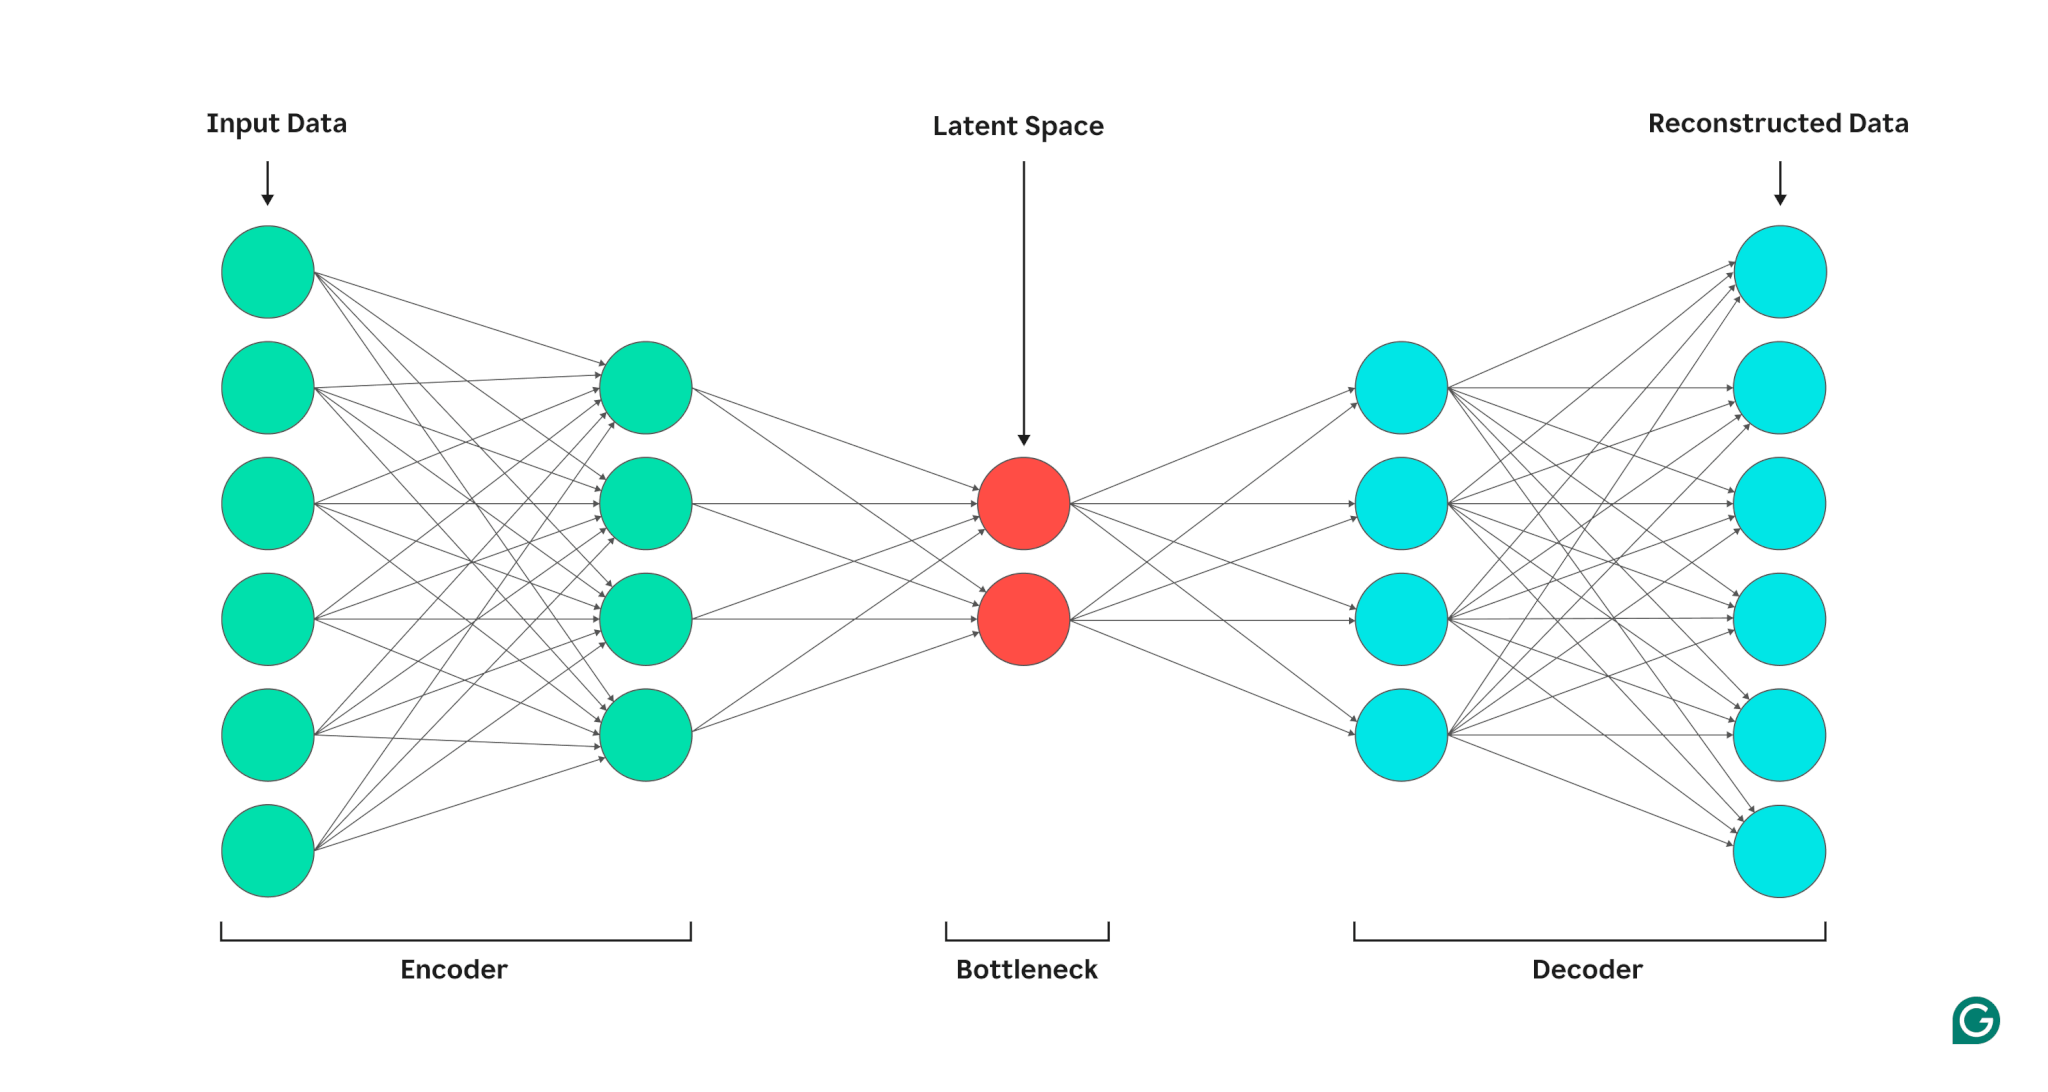

##MNIST FASHION DATASET autoencoders


IMPORTING LIB...

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [ ]:
(x_train,_),(x_test,_)= keras.datasets.fashion_mnist.load_data()

NORM PIXEL

In [ ]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0


FLATTEN IMAGE reshape img to 1D array

In [ ]:
x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

NEURAL NETWORK BUILDING
Define the autoencoder architecture

In [ ]:
input_img = Input(shape=(784,))
encoded = Dense(128,activation='relu')(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

In [ ]:
autoencoder = Model(input_img,decoded)

COMPILE AUTOENCODER

In [ ]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

TRAIN THE AUTOENCODER

In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=11,
                batch_size=33,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3420 - val_loss: 0.2788
Epoch 2/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2734 - val_loss: 0.2711
Epoch 3/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2673 - val_loss: 0.2675
Epoch 4/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.2656 - val_loss: 0.2664
Epoch 5/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2638 - val_loss: 0.2652
Epoch 6/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2619 - val_loss: 0.2651
Epoch 7/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2625 - val_loss: 0.2643
Epoch 8/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2616 - val_loss: 0.2641
Epoch 9/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2622 - val_loss: 0.2641
Epoch 10/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2609 - val_loss: 0.2641
Epoch 11/11
1819/1819 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2620 - val_loss: 0.2638


PRINT ACC

PREDICT

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
autoencoder.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 604,850 (2.31 MB)

 Trainable params: 201,616 (787.56 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 403,234 (1.54 MB)

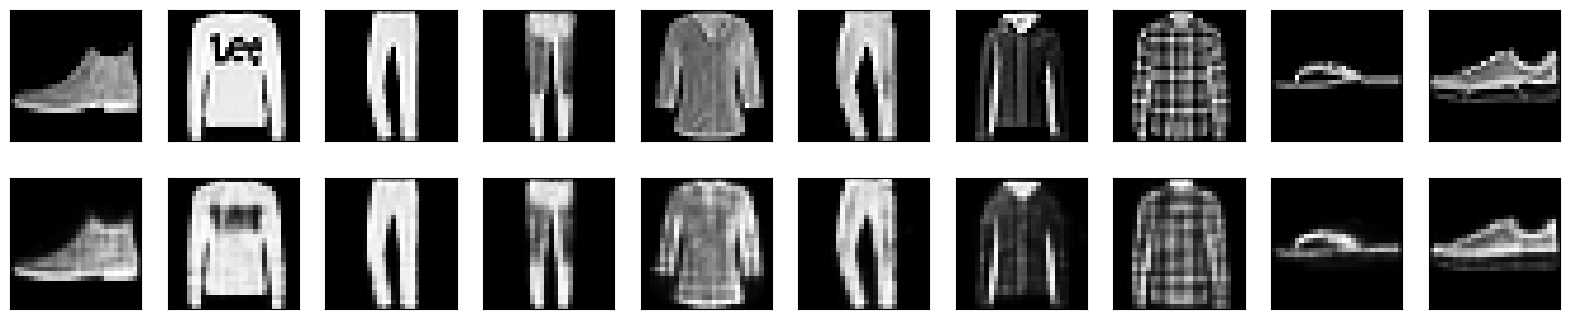

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20,4))
for i in range(n):
  #original image display
  ax = plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
#predicted image display
  ax = plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

##MNIST DIGIT DATASET autoencoders

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model

In [ ]:
(trainX, trainY), (testX, testY) = mnist.load_data()
print('train shape :', (trainX.shape, trainY.shape))
print('test shape :', (testX.shape, testY.shape))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
train shape : ((60000, 28, 28), (60000,))
test shape : ((10000, 28, 28), (10000,))


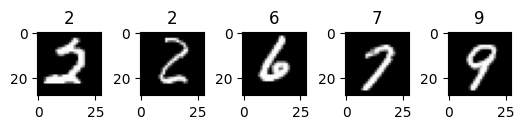

In [ ]:
for j in range(5):
  i = np.random.randint(0,10000)
  plt.subplot(550+1+j)
  plt.imshow(trainX[i],cmap='gray')
  plt.title(trainY[i])
plt.show()

In [ ]:
train_data= np.reshape(trainX,(60000,28*28))
test_data= np.reshape(testX,(10000,28*28))
print(train_data.shape)
print(test_data.shape)

(60000, 784)
(10000, 784)


DESIGN NEURON NETWORK

In [ ]:
#ENCODER
input_data = Input(shape=(784,))
encoded = Dense(100,activation='relu')(input_data)
encoded = Dense(50,activation='relu')(encoded)
encoded = Dense(25,activation='relu')(encoded)
decoded = Dense(2)(encoded)



In [ ]:
#DECODER
decoder=Dense(25,activation='relu')(decoded)
decoder=Dense(50,activation='relu')(decoder)
decoder=Dense(100,activation='relu')(decoder)
decoder=Dense(784)(decoder)

In [ ]:
autoencoder=Model(inputs=input_data,outputs=decoder)
autoencoder.compile(optimizer='adam',loss='mse')
autoencoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 2)              │            52 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 25)             │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 50)             │         1,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 784)            │        79,184 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,536 (666.16 KB)

 Trainable params: 170,536 (666.16 KB)

 Non-trainable params: 0 (0.00 B)

TRAIN THE MODEL

In [ ]:
history=autoencoder.fit(train_data,train_data,epochs=50,batch_size=256,validation_data=(test_data,test_data))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 4492.5757 - val_loss: 3466.8984
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3378.9722 - val_loss: 3199.7563
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3155.0261 - val_loss: 3067.6294
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3035.1174 - val_loss: 2983.8030
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2974.1328 - val_loss: 2952.4893
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2942.3091 - val_loss: 2913.0259
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2888.3347 - val_loss: 2847.9788
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2842.5542 - val_loss: 2813.4756
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2806.6975 - val_loss: 2781.6399
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2768.9507 - val_loss: 2757.6924
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2749.9880 - val_lo

In [ ]:
encoder = Model(inputs=input_data, outputs=encoded)

In [ ]:
encoded_imgs=autoencoder.predict(test_data)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


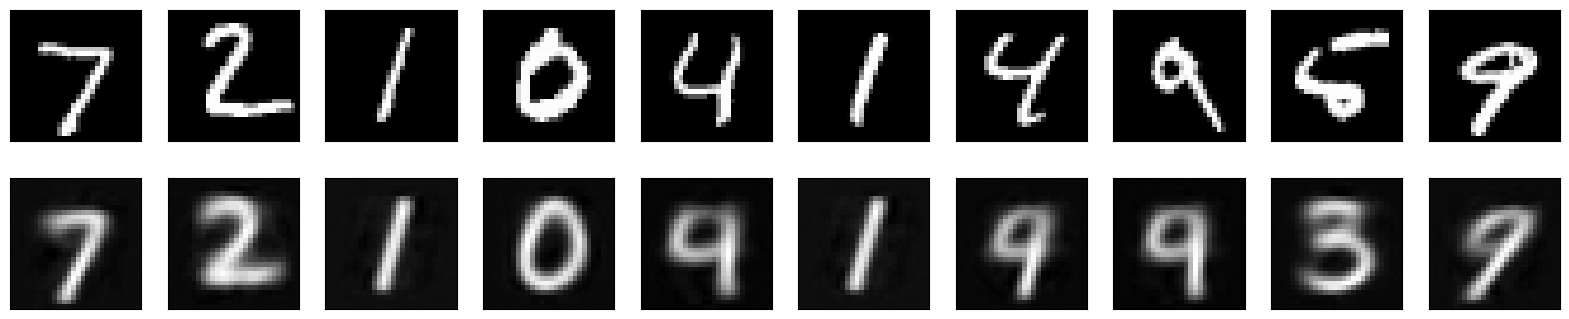

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(testX[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(encoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()